# Mid Term project - 'Online Retail Transaction Analysis ' by MM73053

###### Data Set abstract :  
It is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

###### Source :
Accessing this data does not require to create an account and does not violate any laws.
http://archive.ics.uci.edu/ml/datasets/Online+Retail 

###### Rows: 541910 , Cols : 8  

###### Size : 22.6MB

In [1]:
####importing Required Packages####

import numpy as np # For linear algebra
import pandas as pd #For data processing

# For data visualization
import matplotlib.pyplot as plt  
%matplotlib inline
pd.__version__

'0.23.4'

In [2]:
data_orginal = pd.read_excel("C:\\Users\\lenovo\\Documents\\GitHub\\601_UMBC_IntroToDS\\Midterm Project\\Online Retail.xlsx") #importing data

In [3]:
data = data_orginal.copy() #copying from original data

##  1. Data Exploration 

In [4]:
data.head() #data glimpse

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.shape #Number of Rows and columns

(541909, 8)

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.describe() # describe data

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
data.info() #column types Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
data.count() #count of rows

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

## 2. Data Preprocessing 

In [10]:
data.isnull().sum() #Number of NA values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

1. Product Description - 1454 values are blank, the row data is of no use without it. I decided to Omit such rows from the data
2. Customer ID - 135080 customerID is blank, Cannot fill them with any statiscal means. I dedcided to omit such rows.

In [11]:
data=data.dropna(subset=['CustomerID','Description']) # Drop empty values from col CustID,Description

In [12]:
data.isnull().sum() #Number of NA values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Data validation - No more blank values 

In [13]:
data.duplicated().sum() #to find duplicate rows

5225

In [14]:
data = data.drop_duplicates() #Dropping duplcates

In [15]:
type(data)

pandas.core.frame.DataFrame

In [16]:
data.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

In [17]:
data = data[data.Quantity > 0]#considering data only with quantiy > 0 (excluding negative values)

In [18]:
data['Amount'] = data.Quantity * data.UnitPrice  # Creating new column amount

In [19]:
data['CustomerID'] = data['CustomerID'].astype(int) #converting CustomerID from Float to Integer type

In [20]:
type(data)

pandas.core.frame.DataFrame

In [21]:
data['InvoiceNo'] = data['InvoiceNo'].astype(str) #converting InvoiceNo from Float to Str type

In [22]:
data['Description'] = data['Description'].astype(str) #converting InvoiceNo from Float to Str type

In [23]:
# Updating amount to 1,if their amount is between 0 to 1 

data['Amount'] =data['Amount'].apply(lambda x: 1 if x==0 else x)

In [24]:
data[data['Amount']== 0] #Validating 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount


In [25]:
#data = data[~data.InvoiceNo.str.contains("C",case=False)]
import re
data=data[~data["InvoiceNo"].str.contains('A|C', na=False,regex=True,flags=re.IGNORECASE)] # Removing Invoice Number which contains returned items

## 3. Data Visualisation 

## 3.1 Product Sales Analysis

### Top Selling Products

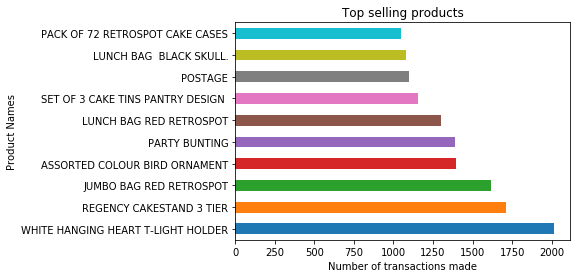

In [26]:
data.groupby('Description')['StockCode'].count().sort_values(ascending=False).head(10).plot(kind='barh')
plt.ylabel('Product Names')
plt.xlabel('Number of transactions made')
plt.title('Top selling products')
plt.show()

I see that hanging Light Holders,Party bunts,Pantry items like - cakestand,cake cases,cake tins are bought frequently by customers.


### Least Selling Products

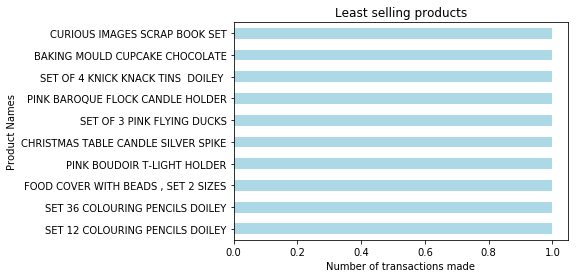

In [27]:
data.groupby('Description')['StockCode'].count().sort_values(ascending=False).tail(10).plot(kind='barh',color = 'Lightblue')
plt.ylabel('Product Names')
plt.xlabel('Number of transactions made')
plt.title('Least selling products')
plt.show()


I see that stationary stuff like pencils,scrap book, candle holders/spikes are least preffered by customers

### Top Revenue generating Products

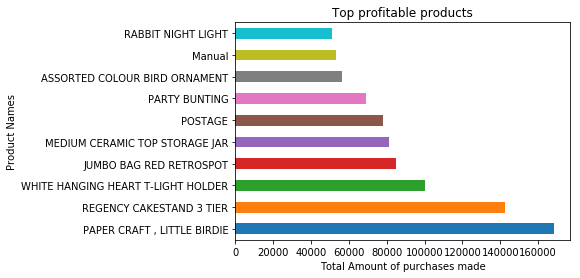

In [28]:
data.groupby('Description')['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.ylabel('Product Names')
plt.xlabel('Total Amount of purchases made')
plt.title('Top profitable products')
plt.show()

Most chunk of money are from products relative to parties, cakes and few assorted items like above

### Least profitable products

In [29]:
data.groupby('Description')['Amount'].sum().sort_values(ascending=False).tail(15)

Description
FUNKY MONKEY MUG                       1.250
DUSTY PINK CHRISTMAS TREE 30CM         1.250
BLUE LEAVES AND BEADS PHONE CHARM      1.250
ORANGE FELT VASE + FLOWERS             1.250
SET 36 COLOURING PENCILS DOILEY        1.250
BLACKCHRISTMAS TREE 30CM               1.250
60 GOLD AND SILVER FAIRY CAKE CASES    1.100
PADS TO MATCH ALL CUSHIONS             1.003
CAT WITH SUNGLASSES BLANK CARD         0.950
HAPPY BIRTHDAY CARD TEDDY/CAKE         0.950
PINK CRYSTAL GUITAR PHONE CHARM        0.850
PURPLE FRANGIPANI HAIRCLIP             0.850
VINTAGE BLUE TINSEL REEL               0.840
SET 12 COLOURING PENCILS DOILEY        0.650
HEN HOUSE W CHICK IN NEST              0.420
Name: Amount, dtype: float64

## 3.2 Country Sales Analysis

###  Countries having most number transactions

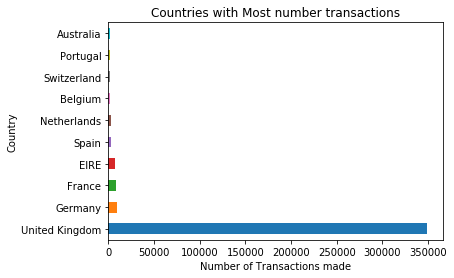

In [30]:
data.groupby('Country')['InvoiceNo'].size().sort_values(ascending=False).head(10).plot(kind='barh')
plt.ylabel('Country')
plt.xlabel('Number of Transactions made')
plt.title('Countries with Most number transactions')
plt.show()

Highest number of footfalls and transactions are done by UK and followed by Germany,France,EIRE,Spain and other European countries. Also, Foot fall is fairly high compared to other countries like Norway,Italy,Finland etc

### Countries having Least number transactions

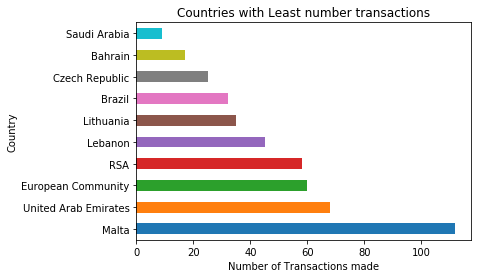

In [31]:
data.groupby('Country')['InvoiceNo'].size().sort_values(ascending=False).tail(10).plot(kind='barh')
plt.ylabel('Country')
plt.xlabel('Number of Transactions made')
plt.title('Countries with Least number transactions')
plt.show()

Least number of foot falls is seen in Malta,UAE and other populat countries like Brazil,Bahrain,Saudi. 

### Countries generating most reveneue

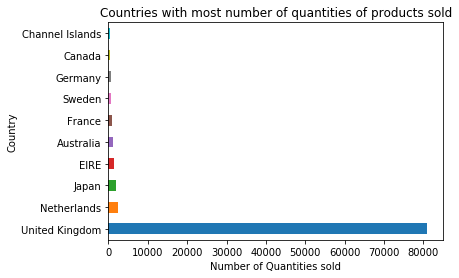

In [32]:
data.groupby('Country')['Quantity'].max().sort_values(ascending=False).head(10).plot(kind='barh')
plt.ylabel('Country')
plt.xlabel('Number of Quantities sold')
plt.title('Countries with most number of quantities of products sold')
plt.show()

Interesting trend I see is countries like Japan,Australia,EIRE having less foot falls , they are buying in more quantities.

## 3.3 Time and Sales Analysis

### Yearly transactions count

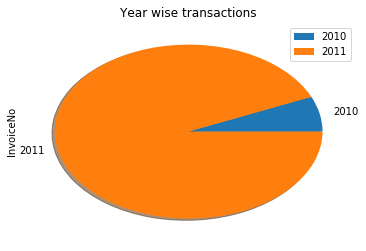

In [33]:
data.groupby(data['InvoiceDate'].dt.year)['InvoiceNo'].size().plot(kind='pie',shadow=True)
plt.title('Year wise transactions')
plt.legend()
plt.show()

2011 has more transactions to 2010 . However, this is due to 2010 data has only transaction of few months

### Yearly revenue generated

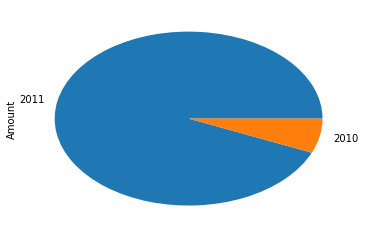

In [34]:
data.groupby(data.InvoiceDate.dt.year)['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='pie')

2011 has generated most revenue compared to 2010 . However, this is due to 2010 data has only transaction of few months

### Monthly transactions count

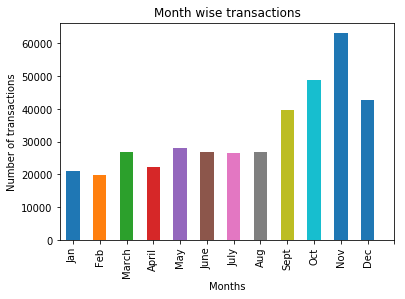

In [35]:
label = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
data.groupby(data.InvoiceDate.dt.month)['InvoiceNo'].size().plot(kind='bar')
plt.title('Year wise transactions')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],label)
plt.ylabel('Number of transactions')
plt.xlabel('Months')
plt.title('Month wise transactions')
plt.show()

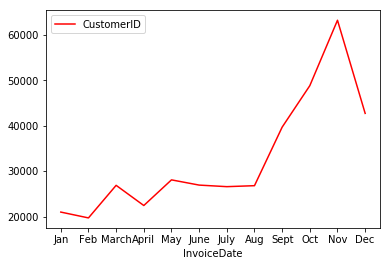

In [36]:
label = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
data.groupby(data.InvoiceDate.dt.month)['CustomerID'].size().plot(kind = 'line',color='Red')
plt.xticks(np.arange(1, 13,1),label)
plt.legend()
plt.show()

Novermber has the highest transactions and febuary has the lease number of overall transactions

### Monthly Revenue

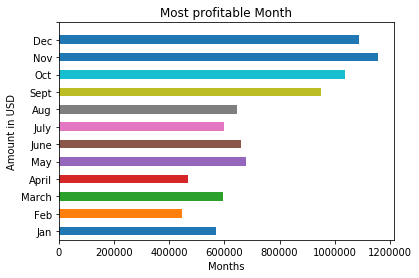

In [37]:
data.groupby(data.InvoiceDate.dt.month)['Amount'].sum().plot(kind='barh')
label = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.title('Year wise transactions')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12],label)
plt.ylabel('Amount in USD')
plt.xlabel('Months')
plt.title('Most profitable Month')
plt.show()

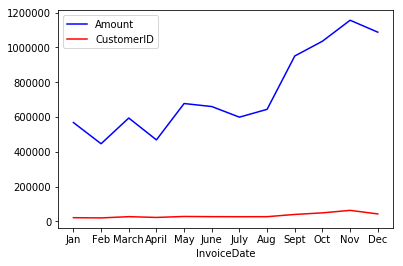

In [38]:
label = ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
data.groupby(data.InvoiceDate.dt.month)['Amount'].sum().plot(kind = 'line',color='blue')
data.groupby(data.InvoiceDate.dt.month)['CustomerID'].size().plot(kind = 'line',color='Red')
plt.xticks(np.arange(1, 13,1),label)
plt.legend()
plt.show()

I see corelation between Total monthwise revenue  and Total number of transactions, in November month spike

### Most Profited Date

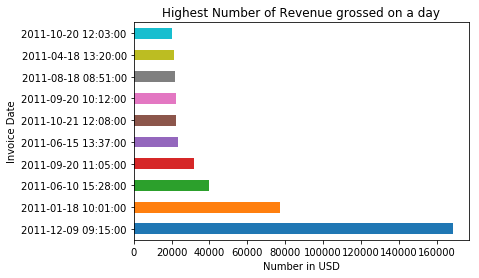

In [39]:
data.groupby(pd.Grouper(key='InvoiceDate'))['Amount'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.ylabel('Invoice Date')
plt.xlabel('Number in USD')
plt.title('Highest Number of Revenue grossed on a day')
plt.show()

Most revenue generated on 9th December,18th Jan,10th June .... I see no correlation to major dates like new year or christmas etc

### Daywise - Quantity sold Vs Revenue generated

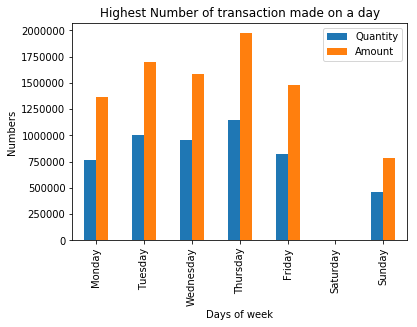

In [40]:
#data.groupby(pd.Grouper(key='InvoiceDate',freq='D')).size()

#data['InvoiceDate'].apply(lambda x: x.weekday())
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
df = data.groupby(data['InvoiceDate'].dt.day_name())[['Quantity','Amount']].sum().reindex(days)
df.plot(kind='bar')
plt.xlabel('Days of week')
plt.ylabel('Numbers')
plt.title('Highest Number of transaction made on a day')
plt.show()

1. I notice there is no transactions on saturday, This indicated the Saturday is holiday or dataset anamoly?
2. Thursay revenue is highest correlating to quantities bought. And Sunday has the least

### Day having highest transactions

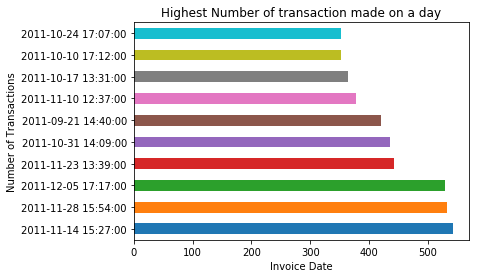

In [41]:
data.groupby(data['InvoiceDate']).size().sort_values(ascending = False).head(10).plot(kind='barh')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Transactions')
plt.title('Highest Number of transaction made on a day')
plt.show()

## Customer Analysis

### Customer having most transactions

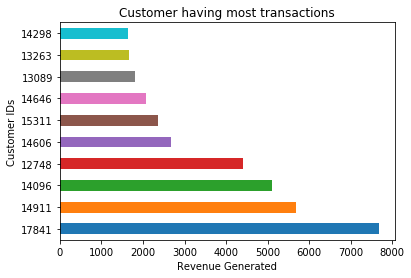

In [42]:
data.groupby(data['CustomerID'])['InvoiceNo'].size().sort_values(ascending = False).head(10).plot(kind='barh')
plt.xlabel('Revenue Generated')
plt.ylabel('Customer IDs')
plt.title('Customer having most transactions')
plt.show()

### Customer who spent the most or Most valuable customer 

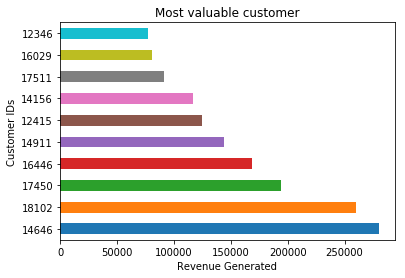

In [43]:
data.groupby(data['CustomerID'])['Amount'].sum().sort_values(ascending = False).head(10).plot(kind='barh')
plt.xlabel('Revenue Generated')
plt.ylabel('Customer IDs')
plt.title('Most valuable customer')
plt.show()

#### Selecting the most valuable customer having ID - 14646 for further analysis

In [44]:
df_cust = data[data['CustomerID'] == 14646] 
df_cust.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,2010-12-20 10:09:00,0.29,14646,Netherlands,3.48
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,2010-12-20 10:09:00,0.29,14646,Netherlands,3.48
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,2010-12-20 10:09:00,4.95,14646,Netherlands,9.90
37955,539491,21931,JUMBO STORAGE BAG SUKI,1,2010-12-20 10:09:00,1.95,14646,Netherlands,1.95
37956,539491,22613,PACK OF 20 SPACEBOY NAPKINS,2,2010-12-20 10:09:00,0.85,14646,Netherlands,1.70
37957,539491,20751,FUNKY WASHING UP GLOVES ASSORTED,1,2010-12-20 10:09:00,2.10,14646,Netherlands,2.10
37958,539491,21246,RED RETROSPOT BIG BOWL,2,2010-12-20 10:09:00,4.95,14646,Netherlands,9.90
37959,539491,22960,JAM MAKING SET WITH JARS,1,2010-12-20 10:09:00,4.25,14646,Netherlands,4.25
37960,539491,22355,CHARLOTTE BAG SUKI DESIGN,2,2010-12-20 10:09:00,0.85,14646,Netherlands,1.70
37961,539491,21123,SET/10 IVORY POLKADOT PARTY CANDLES,2,2010-12-20 10:09:00,1.25,14646,Netherlands,2.50


##### customer is from Netherlands! wow

In [45]:
df_cust.shape

(2080, 9)

### Customer Purchase Analysis

In [46]:
df_cust.groupby(["Description"])[['Quantity','Amount','UnitPrice']].sum().sort_values(by= 'Quantity',ascending = False).head(25)

,Quantity,Amount,UnitPrice
Description,,,
RABBIT NIGHT LIGHT,4801,9568.48,14.27
SPACEBOY LUNCH BOX,4492,7415.40,41.55
PACK OF 72 RETROSPOT CAKE CASES,4104,1726.80,5.17
DOLLY GIRL LUNCH BOX,4096,6758.40,31.35
ROUND SNACK BOXES SET OF4 WOODLAND,3120,7956.00,61.20
RED TOADSTOOL LED NIGHT LIGHT,2376,3459.60,19.25
WOODLAND CHARLOTTE BAG,2300,1656.00,10.80
RED RETROSPOT CHARLOTTE BAG,2100,1512.00,8.64
5 HOOK HANGER RED MAGIC TOADSTOOL,2016,2923.20,10.15


I see that most products bought are related to category of - 

1. Kids : Spaceboy Beaker,mini paintset, red bags, woodland animals, lunch box etc .
2. Party items - Birthday Card, Decoration,cakes and other confectionary

##### Conclusion - Probably this customer is kids Party organiser or philanthropist.

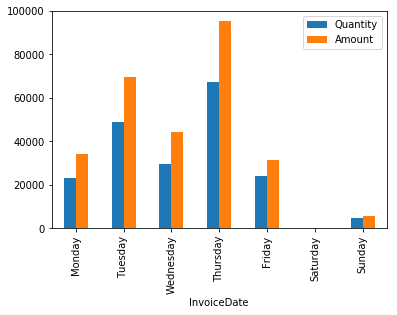

In [47]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
x=df_cust.groupby(data['InvoiceDate'].dt.day_name())[['Quantity','Amount']].sum().reindex(days)
x.plot(kind='bar')

##### This customer is making purchases across all days in week.

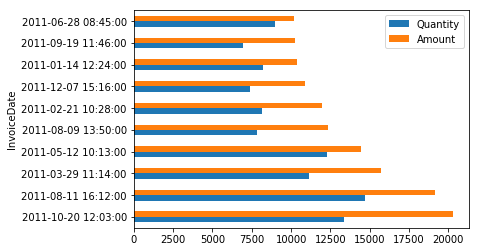

In [48]:
df_cust.groupby(data['InvoiceDate'])[['Quantity','Amount']].sum().sort_values(by = 'Amount',ascending = False).head(10).plot(kind='barh')

##### Customer has made most sale on 20th Oct exceeding 20000USD. Probably huge party was planning in coming days !?

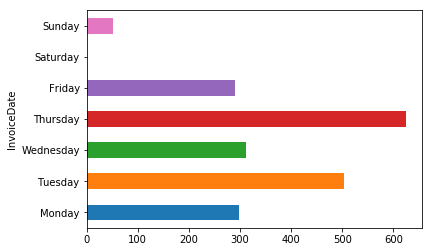

In [49]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
x=df_cust.groupby(data['InvoiceDate'].dt.day_name(),sort= False)['InvoiceDate'].size().reindex(days)
x.plot(kind='barh')

### By observing his transactions patterns, I want to conclude by saying the customer is from Netherlands, who organises kids party often . He is making purchases across all days of week. Probably customer has more time on Thursday and Tuesday as I observe most transactions are made on the respective days. 
 

#### Technical Aspects Learnt

1. Data Exploration 
2. Data Preprocessing - 
    a. Removed Blank cells
    b. Removed Duplicates
    c. Omitted anomalies from columns
    d. Created new column 
    e. Changed datatypes of columns

3. Data Visualization - 
    a. Usage of Matplotlib functions
    b. Different types of graphs based on data 
    c.Story Telling


### Thanks for your assginments and projects. I have gained more grip on the python language .I am much stronger now in EDA analysis and data wrangling using Python.Developed perspective of data visualisation by using MatplotLib 